Wishlist:

* Visualisations! Interactive.

### Questions to answer

* Relation to eigenvectors?
* Why so effective at factorising? What representational power do we lose? Can we measure this?
* How does it work for tensors?
* What do U,V mean intuitively? Rotations on some sort, but to where? Left vs right vector spaces and their relations to U,V.
* What is its computational complexity?
* How to make non-orthogonal matrices?!?!?

* https://en.wikipedia.org/wiki/Higher-order_singular_value_decomposition
* https://en.wikipedia.org/wiki/Tensor_product



In [5]:
import tensorflow as tf
import numpy as np
sess = tf.InteractiveSession()

A = tf.truncated_normal((784,100))
B = tf.truncated_normal((100,45))
C = tf.truncated_normal((3,4,5))
tf.initialize_all_variables().run()

def eig(M):
    eig = tf.self_adjoint_eig(M)
    return eig[1:,:],eig[0,:] #eigenvalues, eigenvectors

def svd2D(x):
    xT = tf.transpose(x)
    u,l = eig(tf.matmul(x,xT)) #which eigen values?
    v,_ = eig(tf.matmul(xT,x)) #the longest set?
    return u,tf.sqrt(l),v

u,s,v  = svd2D(A)
print(u.get_shape(),s.get_shape(),v.get_shape())

TypeError: tuple indices must be integers or slices, not tuple

In [3]:
def isorthonormal(x):
    return tf.equal(tf.cast(x.get_shape()[0],tf.float32) , 
                    tf.trace(tf.round(tf.matmul(x,tf.transpose(x)))))

sess.run(isorthonormal(u))

True

In [4]:
def tensorprod(A,B):
    pass

$$\mathbf {M} =\sum _{i}\mathbf {A} _{i}=\sum _{i}\sigma _{i}\mathbf {U} _{i}\otimes \mathbf {V} _{i}^{\dagger }$$

* So how many times can we do this sum? We are limited by the minimum of the number of columns of U or V. Do we lose accuracy? 
* Does this mean that u and V are ordered according to the singular values?


```python
#Given some tensor
shape = [n1,n2,n3, ... ni]
A = tensor(shape)
for n in shape:
    Ai = reshape(A, [n,others]) 
    #wasteful for 2d? #transpose vs reshape?
    #how does reshape work for potnetially ambiguious shapes? [2x3x2].reshape([2,2,3])
    u,s = eig(Ai * Ai.T) #dont need right-singular vectors
    
    u
```

In [20]:
import functools

In [54]:
shape = C.get_shape()

vectors = []
for n in shape:
    others = [i for i in shape if i!= n] #not very nice...
    m = functools.reduce(lambda x,y:x*y,others) #also ugly
    
    M = tf.reshape(C,[tf.to_int32(n),tf.to_int32(m)]) #will this always work?!? what about ambiguious cases?
    u = tf.self_adjoint_eig(tf.matmul(M,tf.transpose(M)))
    vectors.append(u[1:,:])
    print(u[1:,:].get_shape())

(3, 3)
(4, 4)
(5, 5)


In [11]:
def svd(x):
    """
    n dimensional svd.
    Works recursively.
    
    Args:
    Some tensor. [n x m x ... x l]
    
    Returns:
    S,          singular values
    U,V,W, ...  eigenvectors
    """
    
    x = tf.squeeze(x) #to handle [1 x n x m]
    if len(x.get_shape()) == 2:
        return svd2D(x)[0] #just the left eigenvectors
    else:
        return svd(x[0,:,:]) , svd(x[1:,:,:])
        
sess.run(svd(C))
# why do the numbers change when I run this on the same inputs?
# the decomposition isnt unique? but that shouldnt matter
# with a deterministic algorithm?

(array([ 0.64706647,  1.47833908,  2.42983222,  3.34138894], dtype=float32),
 array([ 0.4552415 ,  1.77607119,  2.16378045,  2.71583319], dtype=float32))

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

#error hear map in 2D
#visualise transforms of U,V

### Non-orthogonal matrix?!?!

How can you make a non-orthogonal matrix using only 2 orthogonal transforms and a scaling??!?!

In [35]:
def test(X):
    return np.linalg.norm(np.dot(X,X.T))**2

In [65]:
M = np.random.standard_normal((2,2))
print(test(M))

6.41351862486


In [66]:
U,S,V = np.linalg.svd(M)
print(test(U),test(V))

2.0 2.0


In [67]:
print(test(np.dot(np.diag(S),V)),test(np.dot(U,np.diag(S))))

6.41351862486 6.41351862486


In [68]:
US = np.dot(U,np.diag(S))
SV = np.dot(np.diag(S),V)
print(test(US),test(SV)) #weird!?! ||US|| == ||SV||

6.41351862486 6.41351862486


In [72]:
print(U,'\n',V) #why are these symmetric?!?

[[-0.63968981 -0.76863317]
 [-0.76863317  0.63968981]] 
 [[-0.98706472  0.16032229]
 [ 0.16032229  0.98706472]]


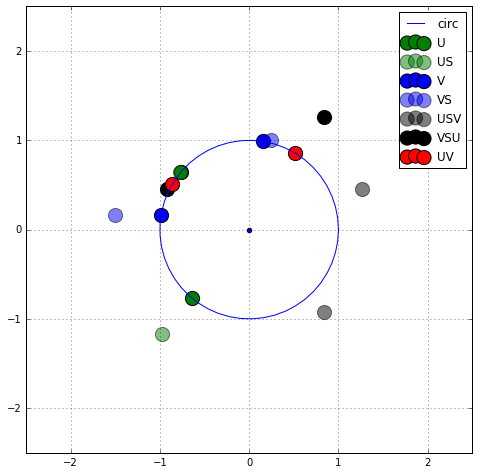

In [73]:
plt.figure(figsize=[8,8])
plt.scatter(*U,s=200,c='g')
plt.scatter(*US,s=200,c='g',alpha=0.5)
plt.scatter(*V,s=200,c='b')
plt.scatter(*SV,s=200,c='b',alpha=0.5)
plt.scatter(*M.T,s=200,c='k',alpha=0.5)
plt.scatter(*M,s=200,c='k',alpha=1)
plt.scatter(*np.dot(U,V),s=200,c='r')
plt.scatter(0,0)
t = np.linspace(0,2*np.pi)
plt.plot(np.cos(t), np.sin(t), linewidth=1)

plt.legend(['circ','U','US','V','VS','USV','VSU','UV'])
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])
plt.grid()
plt.show()

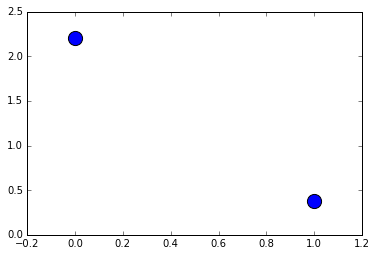

In [64]:
plt.scatter([i for i in range(len(S))],S,s= 200)